### Objective

 
 > Whenever a company launches a new product, it is very imporatant to know the reaction and reviews of the customers. Twitter is one of the such platforms where people share their opinions about a product or anything.
 
 > This is a simple notebook to scrape and analyse the data from twitter using twint. 
 
 > Although twitter does not represent the whole customer population (infact it may be less than 10% of the total customer population), but this analysis may give some important direction to the company that can define their future strategy. Besides it is very easy to get data from twitter as compared to other platforms (instagram, facebook). Also, twitter is fast in terms of getting reaction from the population. i.e. the moment product is launched, first reaction will be seen on twitter.

### Points to Note:

 > There are two methods to scrape data from twitter. 1) Twitter API Collection via Tweepy 2) Non-API Collection via Twint
    
 > Tweepy uses official twitter api, but it limits the number of tweets that can be scrapped (depends on the pricing). It also requires your twitter developer account login etc. For free version, Our searches can only go back 7 days and we get 50 requests a month. 
    
 > Twint is an OSINT (Open Source Intelligence) which uses twitter's own search feature, through which any public tweet can be accessed. There is no limit on the number of tweets that can be scraped using twint. There is no login required.
    
 > It looks like twint is better than tweepy but twint has consistency issues. And twint is very slow as compared to tweepy. Twint can only be used to scrape tweets, but tweepy can be used to interact with twitter, post tweets, automatic retweets, block user, DM a user etc. Read more about it using below links:
 
 > https://towardsai.net/p/nlp/methods-challenges-and-hazards-of-collecting-tweets-9e3e7805095a

 > https://towardsdatascience.com/what-python-package-is-best-for-getting-data-from-twitter-comparing-tweepy-and-twint-f481005eccc9

 > In this tutorial, we will use twint. Twint Library at github:   
 https://github.com/twintproject/twint

### Installation

In [6]:
#conda install git

In [4]:
#pip install twint

#or 

#pip install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint

In [5]:
#pip install nest-asyncio

In [282]:
import twint
import pandas as pd
import re
import nltk 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [148]:
#Twint uses asyncio, which has a history of not playing nice with notebooks, so we need to make sure we have nest-asyncio installed, imported, and applied before we do anything.
import nest_asyncio
nest_asyncio.apply()
#__import__('IPython').embed()

In [149]:
#configuration
tweet_c = twint.Config()

In [150]:
# Try and Keep Retweets
tweet_c.Filter_Retweets=False

# Specify the timeframe of the tweets
tweet_c.Since = "2020-12-25 12:00:00"
tweet_c.Until = "2021-05-26 12:00:00"

In [151]:
#language en for english, fr for french
tweet_c.Lang = "en"


In [152]:
#location
#tweet.Geo = "28.64386,77.12373,1000 km"  #500km radius around delhi

# or use
#tweet.Near = "Delhi"

#refer this link to get geo code of your city https://geocode.xyz/

In [153]:
# Limits results to the number
tweet_c.Limit = '1000'

In [154]:
# Create a Pandas dataframe with the results
tweet_c.Pandas = True

In [155]:
#Search Keyword
keyword = "#redmi"
tweet_c.Search = keyword


In [156]:
# Run the actual search and scrape the tweets
twint.run.Search(tweet_c)

1397317800193110016 2021-05-26 03:54:59 +0530 <Erike_cross> #OlhemALua  Redmi note 9s  #redmi #ShotByMi  https://t.co/QE71BWG6xw
1397280762794156032 2021-05-26 01:27:48 +0530 <sharandeep11> @TechUnboxing5 @RedmiIndia @RedmiSupportIN Affordable smart watch from redmi🔥 Loved the features of this Redmi watch... Built-in GPS/GLONASS, Up to 9 days of battery life and great design. #RedmiWatch #Redmi #Xiaomi #TechUnboxing
1397276710261899267 2021-05-26 01:11:42 +0530 <xitekno> Xiaomi Onarım Modu Özelliği Ortaya Çıktı! Büyük Bir Sorunu Çözüyor #Miui12 #Miui13 #Miui12dot5 #Miui125 #MiuiLife #Xiaomi #Redmi #Poco   https://t.co/ASwpQaOeCz
1397274846707523590 2021-05-26 01:04:18 +0530 <SONIA_VEGANA> Descubre Xiaomi Redmi Note 10 - Smartphone 4+128GB, 6,43” pantalla AMOLED DotDisplay, Snapdragon 678, Cámara cuádruple de 48 MP, 5000mAh, Blanco Guijarro (versión ES) de Xiaomi  https://t.co/tCVgEhKCys a través @amazon #RedmiNote10 #movil #celular #redmi #Xiaomi #Movistar #publi
1397274734853767168 20

1397115654814175235 2021-05-25 14:31:43 +0530 <UniversXiaomi> Les Redmi AirDots 3 Pro dispose d'une réduction de bruit à 3 niveaux jusqu'à 35dB.  #Xiaomi #Redmi #RedmiAirDots #RedmiAirDots3 #RedmiAirDots3Pro #UniversXiaomi  https://t.co/tDGHEbZpGX
1397115626154385408 2021-05-25 14:31:37 +0530 <prashpat7> @manukumarjain @IDC @XiaomiIndia @RedmiIndia Because of honest pricing and amazing featuers. I believe strongly that @XiamenIndia products is value for money  #ilovexiaomi #XiaomiNo1  @manukumarjain   @RedmiIndia  #Mi11XSeries  #Redmi #Xiaomi  #ilovexiaomi #XiaomiIndia
1397115181633769477 2021-05-25 14:29:51 +0530 <ResearchSnipers> #Redmi AirDots 3 Pro Announced For Tomorrow Release  https://t.co/wubT0yM6R7 #airdotspro #redmiairdotspro
1397115123773317122 2021-05-25 14:29:37 +0530 <juhi_jaswal> @manukumarjain I love #Xiaomi #Redmi because of its grear specifications, affordable price and amazing camera quality ❤️❤️  Currently i am using Mi smartphone ,wish to win and upgrade with #Mi11

1397040324447375365 2021-05-25 09:32:23 +0530 <velocity__tech> Redmi AirDots 3 Pro will also launch along with the Note 10 5G series in China. #Xiaomi #Redmi #redminote10series #redmiairdots3pro  https://t.co/YNQCGoF0db
1397040117102043143 2021-05-25 09:31:34 +0530 <smartvenkat95> Redmi AirDots3 Pro noise-cancelling headset launching on May 26 with Qi wireless charging technology  #RedmiAirDots3Pro #Redmi #AirDots3Pro #AirDots3  https://t.co/AlDi9zfqwZ
1397039359317086210 2021-05-25 09:28:33 +0530 <TechBlitz5> #redmi #redmiairdots3Pro  https://t.co/XlWKqOyhtt
1397038778150113282 2021-05-25 09:26:15 +0530 <TechBlitz5> Redmi AirDots 3 Pro launching on 26th May will feature Wireless Charging. #Xiaomi #redmi #redmiairdots3pro  #redminote10series  https://t.co/pPGOlK8Q1f
1397038553318629377 2021-05-25 09:25:21 +0530 <Tech_Master18> Redmi AirDots 3 Pro Confirmed to Launch Alongside Redmi Note 10 Ultra on May 26 #Xiaomi #Redmi #RedmiAirDots3Pro  https://t.co/l7NV54srdx
1397036899718422535 202

1396916814580310018 2021-05-25 01:21:36 +0530 <Vrfinavia> @manukumarjain I ❤️️ Mi Because  Because of awesome designs  Because of better performance  Because of good features  Because of best camera  It's other name is quality  Affordable price   At Last CEO   #Xiaomi #Redmi  #ILoveXiaomi #XiaomiNo1 @manukumarjain @XiaomiIndia  I ❤️ Mi #Xiaomi #Redmi
1396916604529569799 2021-05-25 01:20:46 +0530 <Vrfinavia> @manukumarjain @IDC @XiaomiIndia @RedmiIndia I ❤️️ Mi Because  Because of awesome designs  Because of better performance  Because of good features  Because of best camera  It's other name is quality  Affordable price   At Last CEO   #Xiaomi #Redmi  #ILoveXiaomi #XiaomiNo1 @manukumarjain @XiaomiIndia  I ❤️ Mi #Xiaomi #Redmi
1396916526008074240 2021-05-25 01:20:27 +0530 <Vrfinavia> I ❤️️ Mi Because  Because of awesome designs  Because of better performance  Because of good features  Because of best camera  It's other name is quality  Affordable price   At Last CEO   #Xiaomi #Redmi  #I

1396821840496975876 2021-05-24 19:04:13 +0530 <akhiljoseph> #Redmi Note 10 Pro 5G Key Specifications Appear Online  https://t.co/XvODTruyI7  #Android #news #smartphones #like4like #likeforlike #follow4follow #techblog #technews #futuretechnology #socialmedia #innovation
1396821123396825089 2021-05-24 19:01:22 +0530 <TECH_roiter> Redmi Note 10 Series will feature IPS LCD DCI-P3 color gamut. #redminote10series #redmi  https://t.co/pv0omKl0xN
1396820348557946880 2021-05-24 18:58:17 +0530 <rajv2608> I Love #Xiaomi #Redmi Because its affordable anyone can buy #redmi phone and it also has many great features  #ilovexiaomi #XiaomiNo1   @manukumarjain @RedmiIndia @XiaomiIndia
1396820258481082375 2021-05-24 18:57:55 +0530 <Live_Hindustan> #Redmi का यह मॉडल बना दुनिया में सबसे ज्यादा बिकने वाला #Smartphone    https://t.co/i6YV8bg6nD
1396820009041625094 2021-05-24 18:56:56 +0530 <banashree007> #ilovexiaomi #XiaomiNo1 I love #Xiaomi #Redmi smartphone because it always fulfilled my expectations of 

1396788393602797568 2021-05-24 16:51:18 +0530 <AnuModi_> @manukumarjain @IDC @XiaomiIndia @RedmiIndia I ♥️ Mi #Xiaomi #Redmi #Smartphone  This Is A Milestone..Big Congrats Team @XiaomiIndia @RedmiIndia And The Captain Of The Ship @manukumarjain  Its Time To Party 😍
1396788153357246465 2021-05-24 16:50:21 +0530 <Rittick2804> @manukumarjain I love #Xiaomi #Redmi beacause firstly #xiomi gives us best feature on a cheap price if you compare to other brands.  Secondly Xiomi makes new kind inovation to make their smartphones ♥️💙 Wish to win♥️ #iLoveXiaomi  #XiaomiNo1  #MiFan  #Mi11XPro I ❤️ Mi #Xiaomi   @manukumarjain
1396788027599454208 2021-05-24 16:49:51 +0530 <RajAgra01242214> I love #Xiaomi because it's so easy to use and battery is quite suooortive #Redmi  #iLoveXiaomi  #XiaomiNo1  @manukumarjain #Mi11XPro  I ❤️ Mi #Xiaomi #Redmi
1396787810204491779 2021-05-24 16:48:59 +0530 <Nalinikanta900> Redmi Note 10 5G series will feature 360-degree brightness adjustment, 1 nit minimum brightness

1396768458369499138 2021-05-24 15:32:05 +0530 <varshabharti188> @manukumarjain I ❤️ Mi #Xiaomi #Redmi  #ILoveXiaomi #XiaomiNo1  #MiFan #Mi11xPro  I love #Xiaomi #Redmi because the all you could ask in this advance technology era of smartphone that your smartphone has all the features along with the beautiful design of it and #Xiaomi has all things in it
1396768327901474819 2021-05-24 15:31:34 +0530 <iamitkumarpanda> @manukumarjain @IDC @XiaomiIndia @RedmiIndia No. 1⃣ #Smartphone brand for 1⃣5⃣ quarters.  I love #Xiaomi #Redmi because of the honest price and specification that no one provides.  #iLoveXiaomi #XiaomiNo1 @manukumarjain @hawkeye @RedmiIndia @XiaomiIndia @kasturipaladhi @sumitsonal #Mi11XPro I ❤️ Mi #Xiaomi #Redmi
1396768185404190722 2021-05-24 15:31:00 +0530 <xtr3mE_PsYcH0> I love #Xiaomi and #Redmi because of affordable pricing and maximum features! 🎉🤸🏻‍♀️  #iLoveXiaomi #XiaomiNo1 @manukumarjain  I ❤️ Mi #Xiaomi #Redmi
1396767892763398149 2021-05-24 15:29:50 +0530 <Roop350

1396671614205399040 2021-05-24 09:07:16 +0530 <SavitaNan> @manukumarjain @NiveditaMee @IDC @XiaomiIndia @RedmiIndia #Redmi9A is Desh ka #1⃣ Smartphone  #Redmi9Power #Redmi9Power  I love #Redmi9Power Because of these amazing features 1)  🖥️ #Snapdragon 662 SoC 2) 🔋 #6000mAh battery 3) 📱 #FHD display 4) 📸 #48MP #MiFan  I ❤️ #Redmi
1396671143344365569 2021-05-24 09:05:24 +0530 <SavitaNan> @manukumarjain @RedmiIndia #RedmiNote10S Premium quality &amp; Compact smartphone 😍  📱Super #AMOLED ☀️#1100nits bright  🕹️#HelioG95 📸#64MP 🎶#DualStereo speakers ⚡#33W charging  I love the #Blue colour.   #RedmiNote10S  I ❤️ #Redmi @RedmiIndia  @manukumarjain  https://t.co/lf1MptjA6g
1396670064896532481 2021-05-24 09:01:07 +0530 <_Inditechnical> Inditechnical: Redmi Note 10 Pro 5G will feature a 64-megapixel r...  https://t.co/q5ZpRjLKQI  #Redmi #RedmiNote10Pro5G  https://t.co/GtI2u0BWm8
1396669785513938947 2021-05-24 09:00:00 +0530 <techmatehindi> #best #smartphone  under 15k Which one you choose? I pick

1396407360063643650 2021-05-23 15:37:13 +0530 <Tech_EdgeTE> Redmi Note 10 5G series will feature NFC 3.0 Bluetooth 5.2  #Xiaomi #redmi #RedmiNote10Ultra #redminote10series #RedmiNote10pro  https://t.co/QVXoYKKC5J
1396406021946478594 2021-05-23 15:31:54 +0530 <solamideastute> @djjimmyjatt An Android phone, preferably #Redmi #Jjredminote10pro
1396405910000390145 2021-05-23 15:31:27 +0530 <prathamesh_tech> Redmi Note 10 Pro 5G Official Render by  https://t.co/Rl6hyDth15  #Redmi #RedmiNote10Pro5G #RedmiNote10Pro #RedmiNote10ProMax #RedmiNote10 #RedmiNote10Ultra #RedmiNote10Series #RedmiBookPro #Xiaomi  https://t.co/DCvneSbbc4
1396405710301319168 2021-05-23 15:30:39 +0530 <jazztel_es> ¡#GUÍAS de JAZZTEL! Toda la ayuda y especificaciones que necesitas para configurar el Xiaomi Redmi Note 9 Pro.  https://t.co/eiuoFAo5X6 . #comunidadjazztel #guíasdejazztel #terminales #xiaomi #redmi #note9 #pro  https://t.co/KhaSj7RfBy
1396404993654022148 2021-05-23 15:27:49 +0530 <stufflistings> 😍 This is a d

1396254573992554499 2021-05-23 05:30:06 +0530 <tiendingtopic> Xiaomi Redmi Note 9 Pro -  Smartphone con pantalla -14% pasa de 226.63 € a 194.46 € y te ahorras 32.17 € #camara #smartphone #xiaomi #bateria #pantalla #redmi #note #gris Añadir a carrito Amazon: https://t.co/aLJDHdkhQK Ver ficha:  https://t.co/tRW8bvdyes  https://t.co/PzGkfURqAt
1396251593058570245 2021-05-23 05:18:15 +0530 <thaqfny_shukran> Redmi Note 8 2021 تم الكشف عن تصميمه في إعلان تشويقي جديد  https://t.co/JySCKvRNBF  #Redmi #Redmi_Note_8 #Redmi_Note_8_2021
1396228091954049025 2021-05-23 03:44:52 +0530 <Tsbandeira> Virei testemunha de Xiaomi. Falta só aprender a mexer nisso aí.  #redmi #airdots3 #xiaomi #redmiairdots #blue #headset em Rio de Janeiro, Rio de Janeiro  https://t.co/KfPzRgGKiS
1396225832826200064 2021-05-23 03:35:53 +0530 <Homicidiosbo1> •   Contáctanos +58 412-9009536/+58 424-2830176📲  #ComprasOnline #soloenmatrixelectronic #smartphone #caracas #samsung #ofertas #descuentos #Redmi #deliveryservice #deliv

1396032851414556674 2021-05-22 14:49:03 +0530 <TECH_ONDUTY> Alleged Redmi K40 Light Luxury Edition📲 😍😍😍💯with Dimensity 1100 processor visits Geekbench ahead of launch. #Xiaomi #Redmi #RedmiK40LightLuxuryEdition  https://t.co/hwmfXKYPr1
1396031505340592128 2021-05-22 14:43:42 +0530 <RaghavTechie> Redmi Note 10 Ultra as well. The alleged image has been making rounds on Weibo. Dimensity 1100, 6.53-inch AMOLED, 5,000mAh/33W. The 6GB/128GB variant will start at Yuan 1,799  #Xiaomi #Redmi #RedmiNote10Ultra  https://t.co/K0isSs7CYO
1396030216712204290 2021-05-22 14:38:35 +0530 <MayankkumarYT> Redmi Note 10 5G Series (China) Front look😍😍 Having Center Punchhole Display IR Blaster #Redmi #RedmiNote10Ultra  https://t.co/h3TPmjgztk
1396028411248881664 2021-05-22 14:31:24 +0530 <UniversXiaomi> La série Redmi Note 10 chinoise utilisera un "quadruple matériau de dissipation thermique" : VC, graphite, gel conducteur thermique, feuille de cuivre !   #Xiaomi #Redmi #RedmiNote #RedmiNote10 #UniversXiaom

In [157]:
# Convert it into an easier-to-read dataframe variable
twint_df = twint.storage.panda.Tweets_df

In [158]:
twint_df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'timezone', 'place',
       'tweet', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [159]:
twint_df.shape

(1058, 38)

In [160]:
twint_df.head()

id      conversation_id    created_at  \
0  1397317800193110016  1397317800193110016  1.621981e+12   
1  1397280762794156032  1392737320219025408  1.621973e+12   
2  1397276710261899267  1397276710261899267  1.621972e+12   
3  1397274846707523590  1397274846707523590  1.621971e+12   
4  1397274734853767168  1397274734853767168  1.621971e+12   

                  date timezone place  \
0  2021-05-26 03:54:59    +0530         
1  2021-05-26 01:27:48    +0530         
2  2021-05-26 01:11:42    +0530         
3  2021-05-26 01:04:18    +0530         
4  2021-05-26 01:03:51    +0530         

                                               tweet language  \
0  #OlhemALua  Redmi note 9s  #redmi #ShotByMi  h...       es   
1  @TechUnboxing5 @RedmiIndia @RedmiSupportIN Aff...       en   
2  Xiaomi Onarım Modu Özelliği Ortaya Çıktı! Büyü...       tr   
3  Descubre Xiaomi Redmi Note 10 - Smartphone 4+1...       es   
4  Descubre Xiaomi Redmi Note 10 Pro Smartphone R...      und   

                                            hashtags cashtags  ...  geo  \
0                       [olhemalua, redmi, shotbymi]       []  ...        
1          [redmiwatch, redmi, xiaomi, techunboxing]       []  ...        
2  [miui12, miui13, miui12dot5, miui125, miuilife...       []  ...        
3  [redminote10, movil, celular, redmi, xiaomi, m...       []  ...        
4  [redminote10pro, xiaomi, publi, redmi, movil, ...       []  ...        

  source user_rt_id user_rt  retweet_id  \
0                                         
1                                         
2                                         
3                                         
4                                         

                                            reply_to retweet_date translate  \
0                                                 []                          
1  [{'screen_name': 'TechUnboxing5', 'name': 'Tec...                          
2                                                 []                          
3                                                 []                          
4                                                 []                          

  trans_src  trans_dest  
0                        
1                        
2                        
3                        
4                        

[5 rows x 38 columns]

### Wordcloud

In [161]:
#getting relavent columns

tweet_df = twint_df[['id', "tweet",]]

**Number of stop Words:**

In [162]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

tweet_df['stopwords'] = tweet_df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
tweet_df[['stopwords']].head()

<ipython-input-162-25612fae15ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['stopwords'] = tweet_df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))


stopwords
0          0
1          7
2          0
3          1
4          0

### Clearning the data

In [163]:
def cleanHtml(sentence): #function to clear html points
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r' ',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/|_|-]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned
def keepAlpha(sentence): #function to keep only alpha value
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent


def decontraction(text):         #Decontractions
    #specific Decontractions
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    #general Decontractions
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    
    return text

In [164]:
tweet_df['tweet'] = tweet_df['tweet'].str.lower()
tweet_df['tweet'] = tweet_df['tweet'].apply(cleanHtml)
tweet_df['tweet'] = tweet_df['tweet'].apply(cleanPunc)
tweet_df['tweet'] = tweet_df['tweet'].apply(keepAlpha)
tweet_df['tweet'] = tweet_df['tweet'].apply(decontraction)

<ipython-input-164-2c8c58cc2f1f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'] = tweet_df['tweet'].str.lower()
<ipython-input-164-2c8c58cc2f1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'] = tweet_df['tweet'].apply(cleanHtml)
<ipython-input-164-2c8c58cc2f1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

**Removal of StopWords**

In [165]:
from nltk.corpus import stopwords
stop_words = list(set(stopwords.words('english')))
len(stop_words)

179

In [166]:
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

In [167]:
tweet_df['tweet'] = tweet_df['tweet'].apply(removeStopWords)


<ipython-input-167-d4ef9688437b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_df['tweet'] = tweet_df['tweet'].apply(removeStopWords)


## Wordcloud

In [268]:
words_to_exclude = ['xiaomi', 'redmi', 'manu', 'http']

def create_wordcloud(text):
    #mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    cleaned_word = " ".join([word for word in text.split()
                            if all(ele not in word for ele in words_to_exclude)
                                and not word.startswith('@')
                                and word != 'RT'])
    wc = WordCloud(
    #mask = mask,
    max_words=3000,
    min_word_length =3,
    collocation_threshold = 20,
    stopwords=stopwords,
    repeat=True)
    wc.generate(cleaned_word)
    #wc.to_file("wc.png")
    #path="wc.png"
    #display(Image.open(path))
    
    fig = plt.figure(1,figsize=(30, 50))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis('off')
    plt.show()

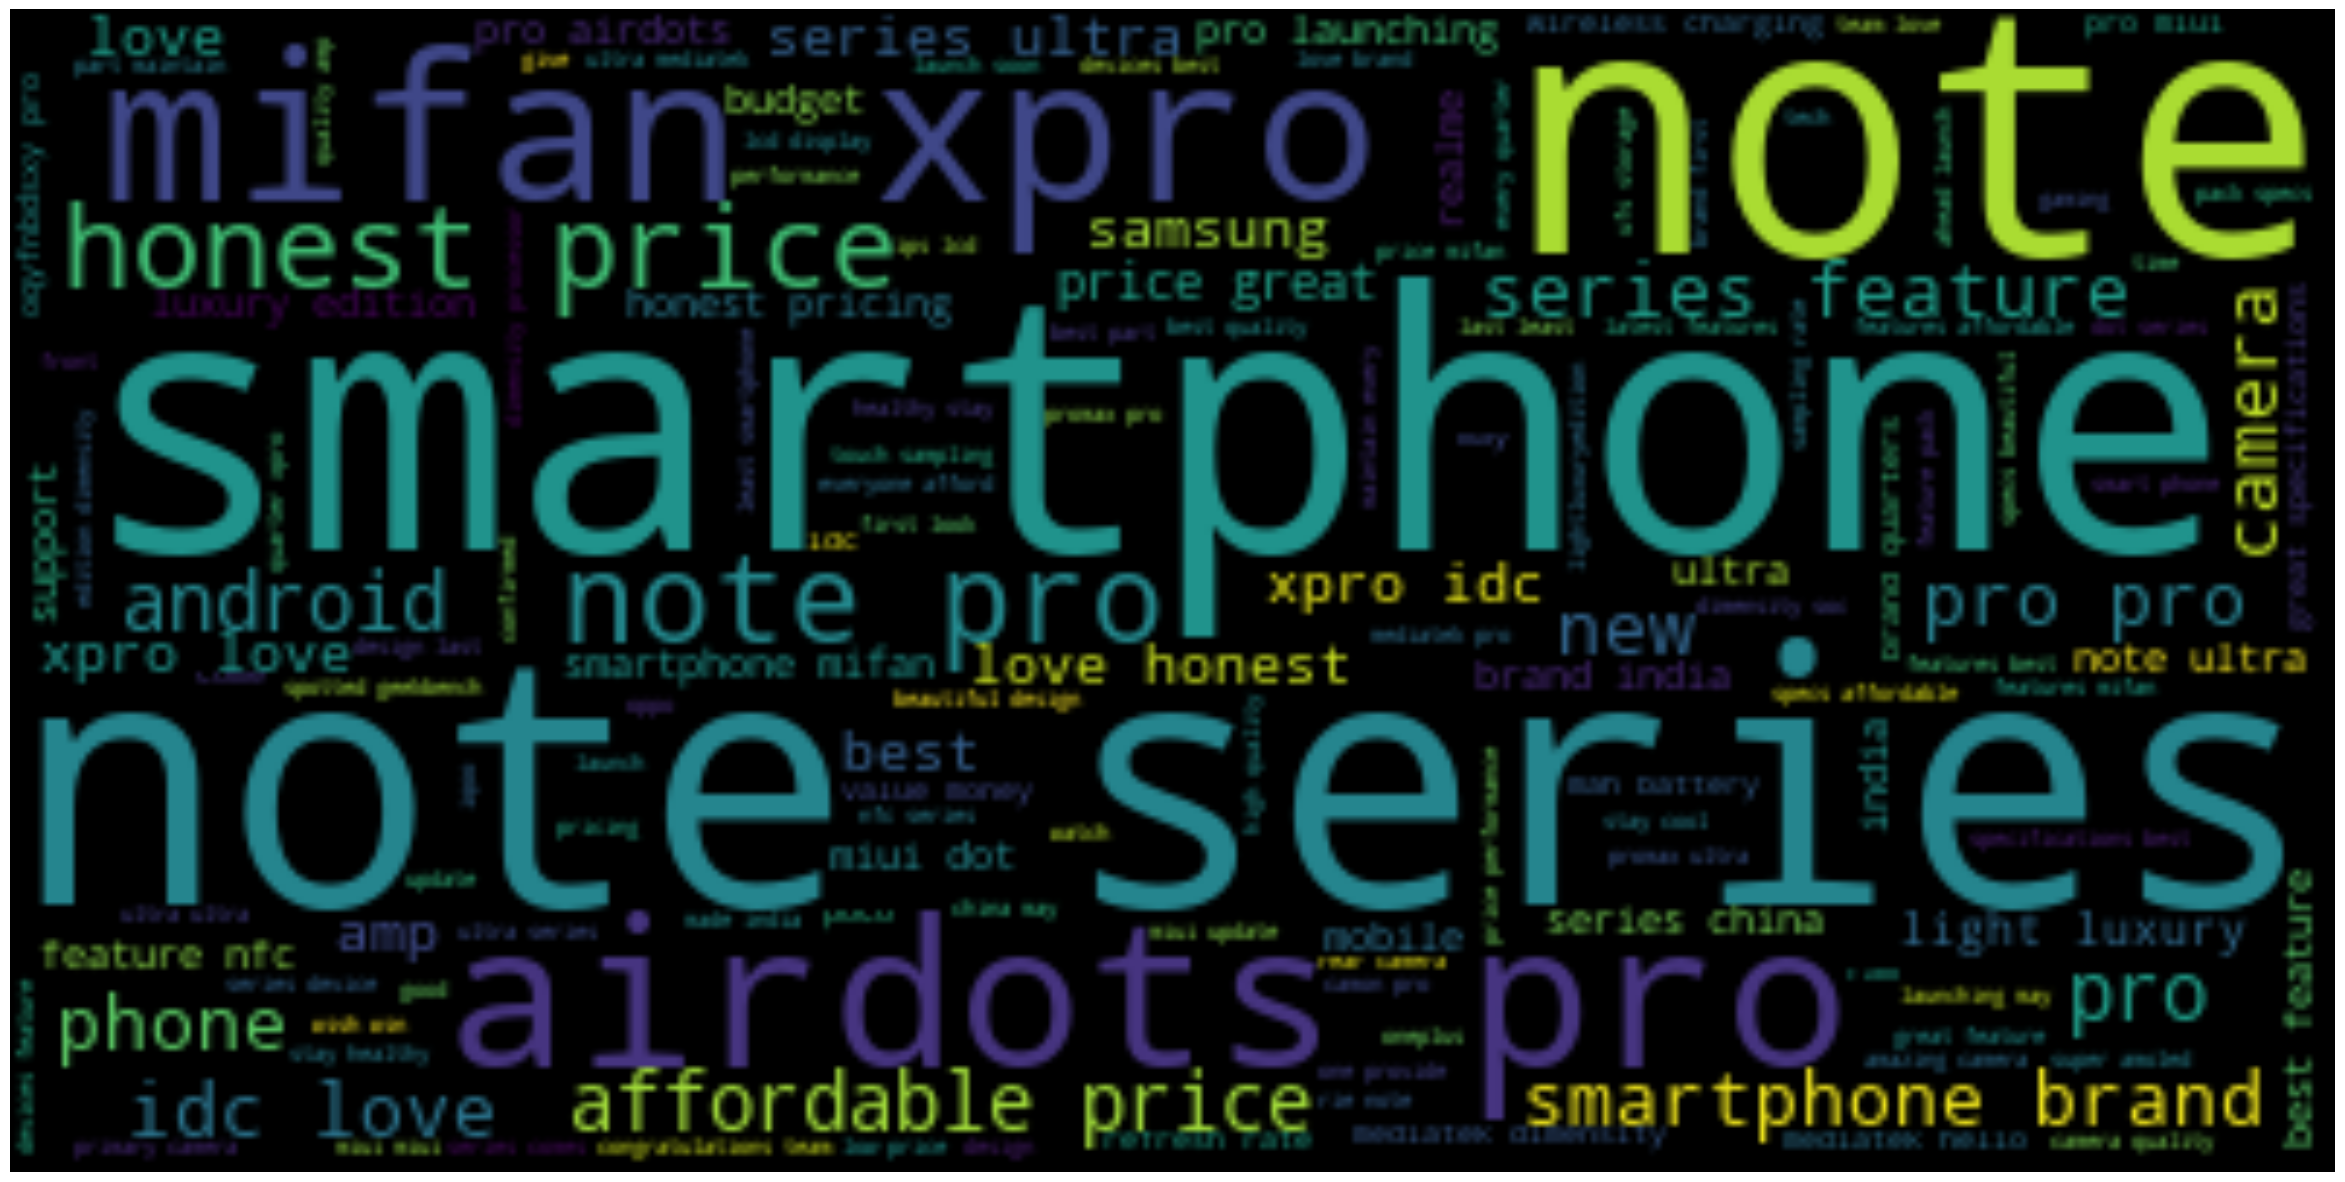

In [269]:
create_wordcloud(' '.join(tweet_df['tweet']))

## Sentiment Analysis

> Here we will do sentiment analysis using nltk SentimentIntensityAnalyzer to identify postive, negative and neutral tweets.

> Once positive and negative tweets are identified, we can create separate wordclouds for positive and negative tweets and identify which aspects/keywords/features customers liked and which customers did not like.

In [270]:
#https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [271]:
#from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer

In [272]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

In [187]:
positive = 0
negative = 0
neutral = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for i in range(tweet_df.shape[0]):
 
    #print(tweet.text)
    tweet_list.append(tweet_df.tweet[i])
    score = SentimentIntensityAnalyzer().polarity_scores(tweet_df.tweet[i])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
 
    if neg > pos:
        negative_list.append(tweet_df.tweet[i])
        negative += 1
    elif pos > neg:
        positive_list.append(tweet_df.tweet[i])
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet_df.tweet[i])
        neutral += 1
positive = percentage(positive, tweet_df.shape[0])
negative = percentage(negative, tweet_df.shape[0])
neutral = percentage(neutral, tweet_df.shape[0])
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [189]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1058
positive number:  484
negative number:  89
neutral number:  485


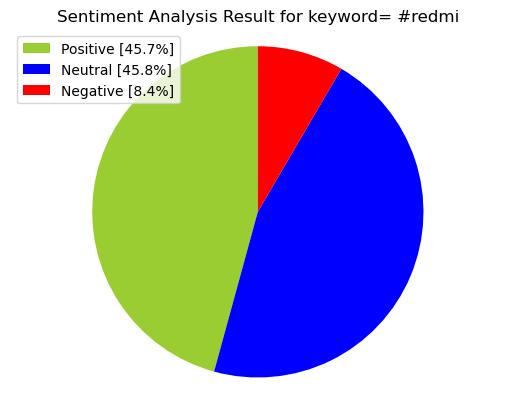

In [190]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword= "+keyword+"" )
plt.axis('equal')
plt.show()

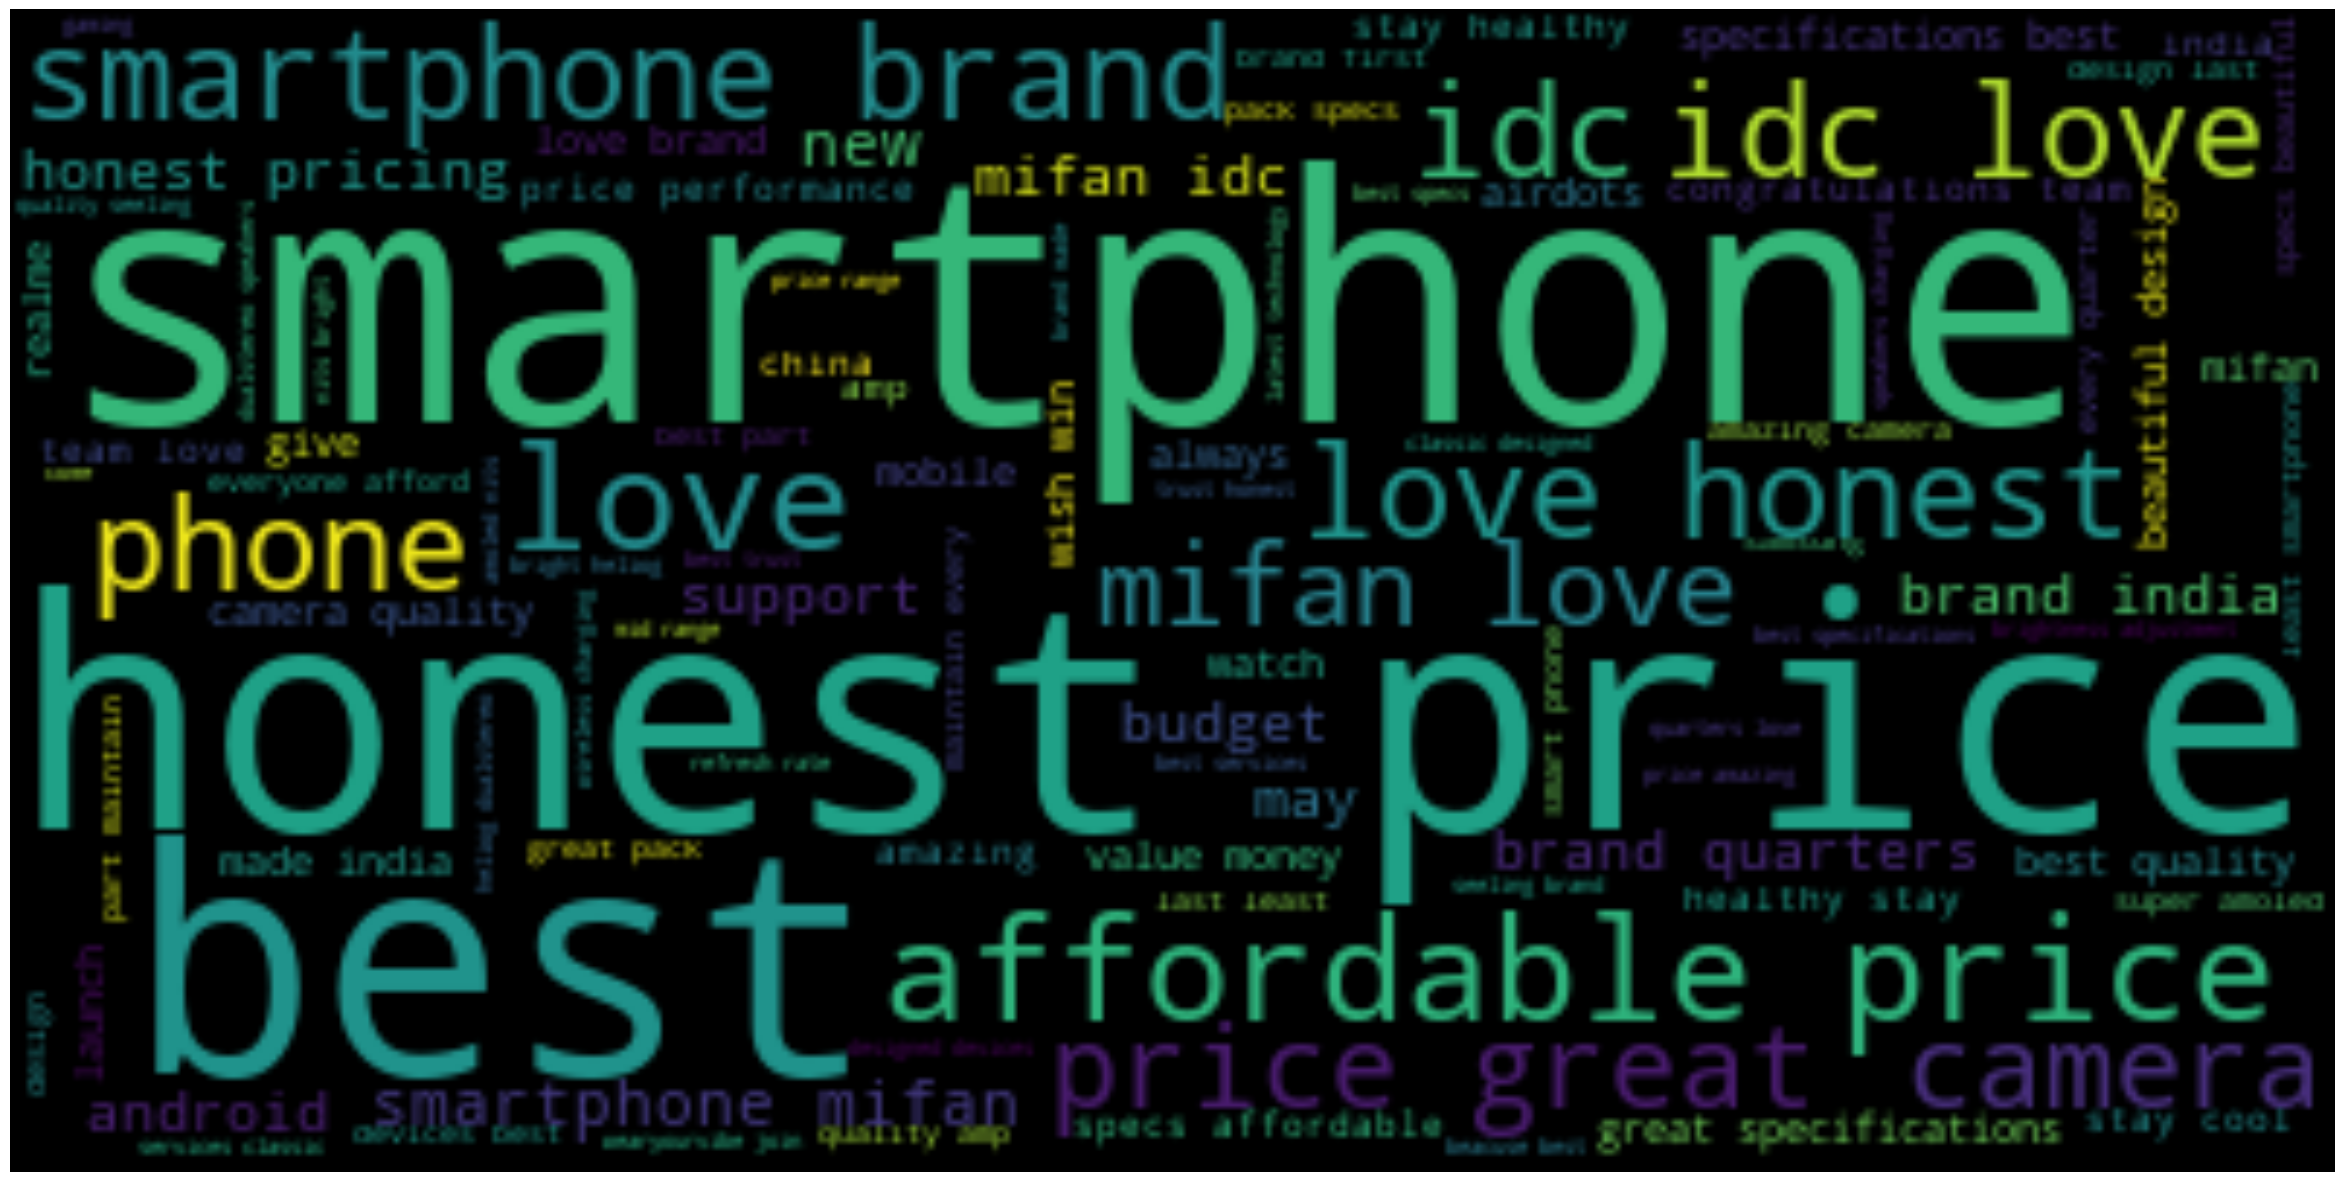

In [274]:
#plotting word cloud of positive reviews
words_to_exclude = ['xiaomi', 'redmi', 'manu', 'http', 'feature', 'series', 'note', 'nfc', 'pro', 'ultra', 'miui']

create_wordcloud(' '.join(positive_list[0]))

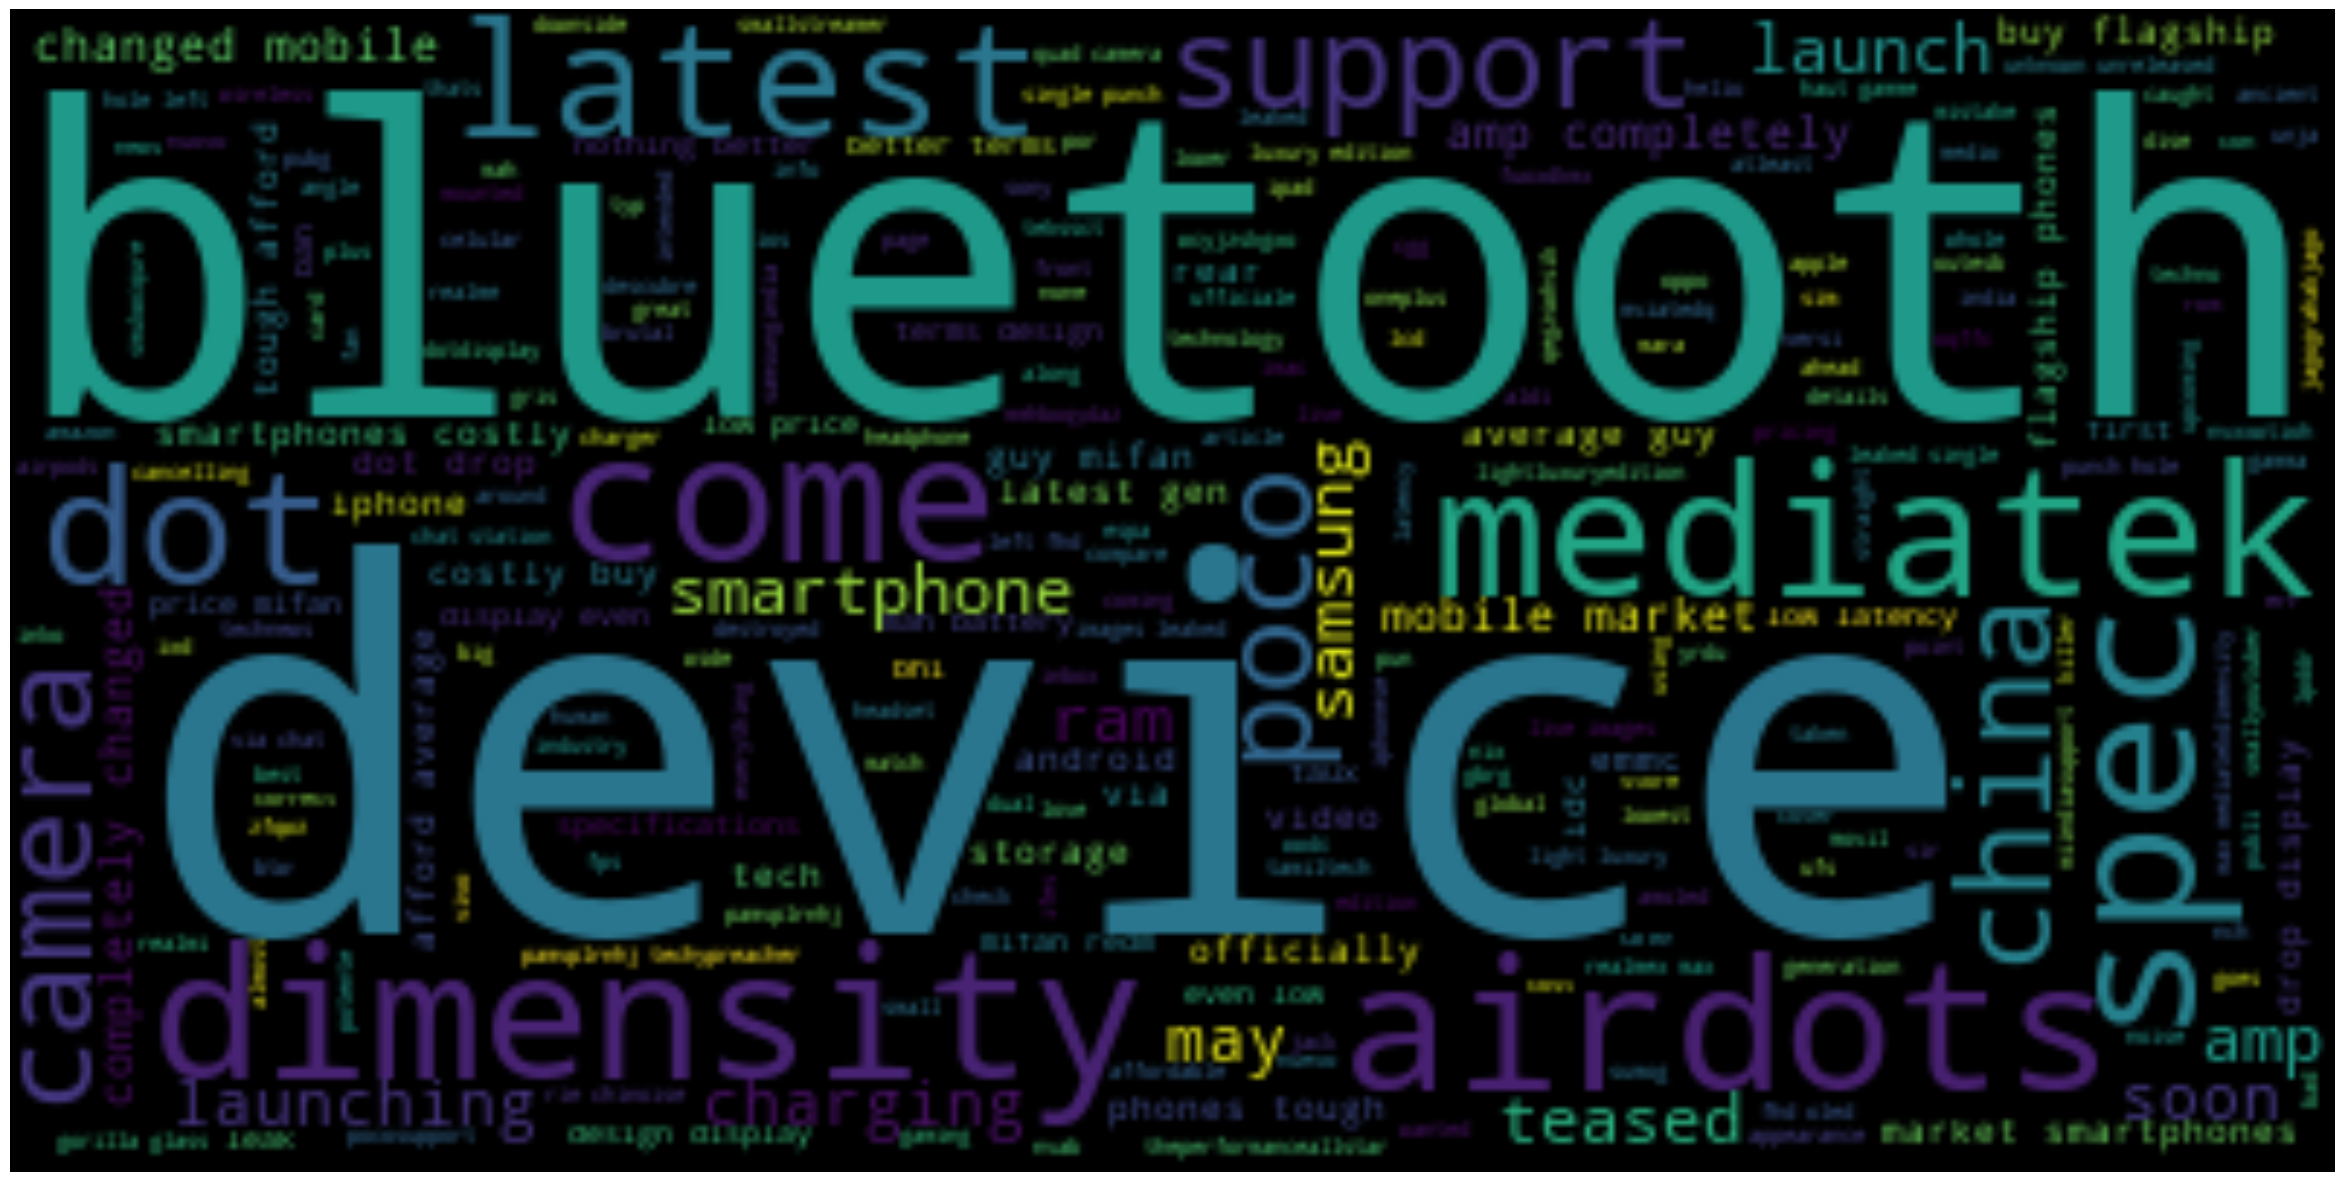

In [273]:
#plotting word cloud of negative reviews
#words_to_exclude will come from trial and error
words_to_exclude = ['xiaomi', 'redmi', 'manu', 'http', 'feature', 'series', 'note', 'nfc', 'pro', 'ultra', 'miui']

create_wordcloud(' '.join(negative_list[0]))

 > In negative tweets, we can see that bluetooth is the most important keyword

In [276]:
# create a dictionary of word frequencies
text_dictionary = wordcloud.process_text(' '.join(negative_list[0]))
# sort the dictionary
word_freq={k: v for k, v in sorted(text_dictionary.items(),reverse=True, key=lambda item: item[1])}

#use words_ to print relative word frequencies
rel_freq=wordcloud.words_

#print results
print("Most frequent words")
print(list(word_freq.items())[0:50])
print("Least frequent words")
print(list(word_freq.items())[-100:-50])


Most frequent words
[('https co', 86), ('redmi note', 54), ('xiaomi redmi', 52), ('redmi redminote', 44), ('redminote ultra', 34), ('redminote series', 27), ('g', 24), ('feature nfc', 22), ('redminote pro', 21), ('note g', 21), ('mp', 20), ('g series', 20), ('de', 16), ('mi', 15), ('note series', 14), ('ultra redminote', 14), ('series feature', 14), ('xiaomi', 13), ('nfc xiaomi', 13), ('ultra https', 12), ('dimensity', 10), ('series devices', 10), ('devices feature', 10), ('gb', 9), ('miui', 9), ('manukumarjain xiaomiindia', 9), ('ilovexiaomi xiaomino', 9), ('amp', 8), ('x', 8), ('u', 8), ('redmi ilovexiaomi', 8), ('redminote promax', 8), ('pro', 7), ('hz', 7), ('camera', 7), ('xiaomiindia redmiindia', 7), ('nfc bluetooth', 7), ('mediatek', 6), ('price', 6), ('leaked', 6), ('come', 6), ('bluetooth', 6), ('spec', 6), ('latest', 6), ('redmik', 6), ('airdots pro', 6), ('display', 5), ('w', 5), ('via', 5), ('latency', 5)]
Least frequent words
[('dnt', 1), ('knw', 1), ('whats', 1), ('phiti'